# **LIBRERÍAS**

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# get train and test sets
import sklearn.model_selection

# **DATASET**

In [4]:
def load_samples(directory, size=None):
    data = pd.read_csv(directory, sep='\t', header=None) 

    print('Nº rows:', len(data))
    
    X = []
    Y = []
    for i in range(len(data)):
        imgname = data.iloc[i,0]
        img = cv2.imread(imgname)
        img = cv2.resize(img, size)
        
        X.append(img)
        Y.append(data.iloc[i,1])

    return (np.array(X), np.array(Y))

In [5]:
X, Y = load_samples("dataset_cleaned.csv", (64,64)) # for higher resolutions

Nº rows: 6701


In [6]:
print(X.shape)
print(Y.shape)

(6701, 64, 64, 3)
(6701,)


---

In [7]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.20, random_state=33)

# Normalizar las imágenes
X_train = X_train / 255.0
X_test = X_test / 255.0

# **MODELO**

In [8]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/20
84/84 [==============================] - 3s 9ms/step - loss: 0.1312 - val_loss: 0.0883
Epoch 2/20
84/84 [==============================] - 0s 6ms/step - loss: 0.0813 - val_loss: 0.0598
Epoch 3/20
84/84 [==============================] - 0s 6ms/step - loss: 0.0641 - val_loss: 0.0586
Epoch 4/20
84/84 [==============================] - 0s 6ms/step - loss: 0.0530 - val_loss: 0.0457
Epoch 5/20
84/84 [==============================] - 0s 6ms/step - loss: 0.0455 - val_loss: 0.0399
Epoch 6/20
84/84 [==============================] - 0s 6ms/step - loss: 0.0392 - val_loss: 0.0379
Epoch 7/20
84/84 [==============================] - 0s 6ms/step - loss: 0.0358 - val_loss: 0.0333
Epoch 8/20
84/84 [==============================] - 0s 6ms/step - loss: 0.0331 - val_loss: 0.0323
Epoch 9/20
84/84 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.0343
Epoch 10/20
84/84 [==============================] - 1s 6ms/step - loss: 0.0296 - val_loss: 0.0349
Epoch 11/20
84/84 [

In [11]:
val_loss = model.evaluate(X_test, Y_test)
print(f'Validation Loss: {val_loss}')

42/42 [==============================] - 0s 2ms/step - loss: 0.0268
Validation Loss: 0.02677307277917862


In [21]:
model.save('modelo_CYBERRY_flechas.keras')

# **PREDICCIONES**

In [13]:
model = keras.models.load_model('modelo_CYBERRY_flechas.keras')

In [14]:
import random

data = pd.read_csv('dataset_cleaned.csv', sep='\t', header=None) 
print(len(data))

6701


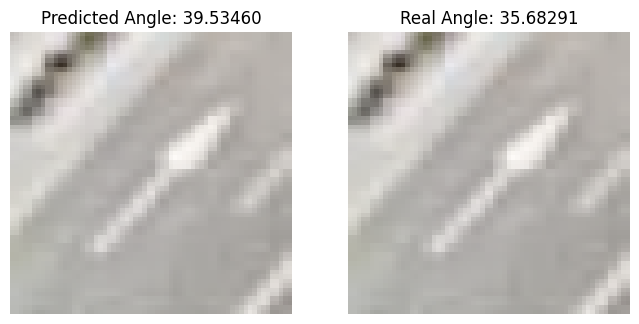

In [19]:
indice_random = random.randint(0, len(data))

new_image = Image.open(data.iloc[indice_random][0]).convert('RGB')
new_image = np.array(new_image) / 255.0
auxliar = new_image
new_image = np.expand_dims(new_image, axis=0)

predicted_angle = model(new_image)
# ----------------------------------------
fig = plt.figure(figsize=(8,4))

fig.add_subplot(1,2,1)
plt.imshow(auxliar)
plt.axis(False)
plt.title(f'Predicted Angle: {360*predicted_angle[0][0]:.5f}') # [[value]]

fig.add_subplot(1,2,2)
plt.imshow(auxliar)
plt.axis(False)
plt.title(f'Real Angle: {360*data.iloc[indice_random][1]:.5f}') # este es el valor que busco

plt.show()

# **APARTE**

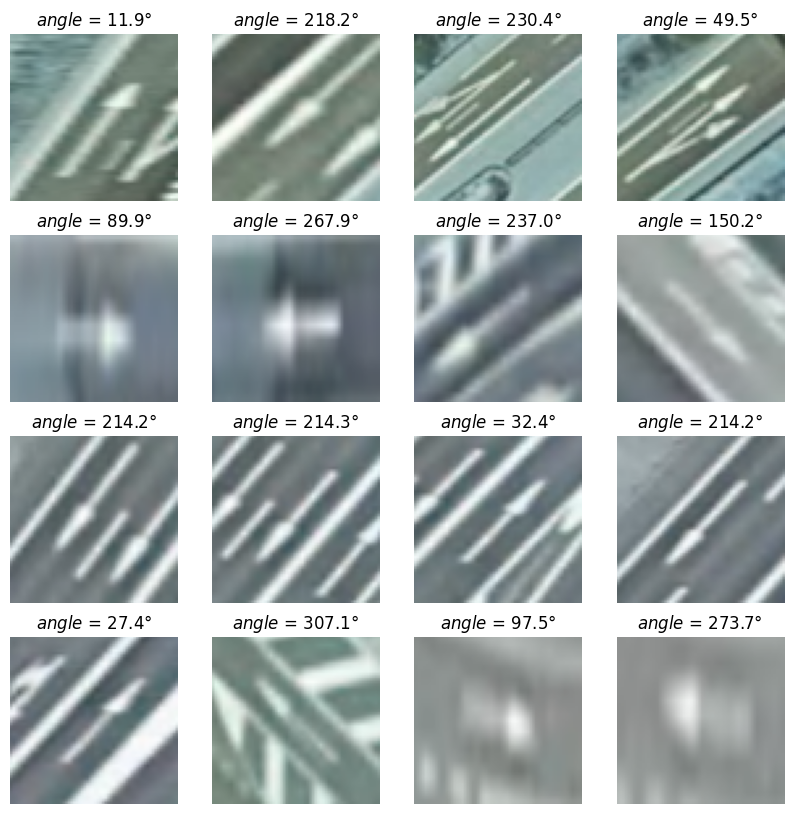

In [20]:
N = 16

fig, axs = plt.subplots(N//4,4,figsize=(10, 10*N//16))
axs = axs.flatten()
plt.axis('off')

im0 = 567
for i in range(N):
    axs[i].axis('off')
    axs[i].imshow(X[im0+i])
    axs[i].title.set_text(f"$angle$ = {(360*Y[im0+i]):.1f}°")